<a href="https://colab.research.google.com/github/udaybhaskar717/Solar-Irradiance-Forecasting/blob/main/IITB_Floating_Solar_power_forecasting_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, LSTM, RepeatVector, Flatten
from keras.layers import TimeDistributed
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff


from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

## Importing Libraries

In [4]:
import sys, os
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt
from matplotlib.pyplot       import figure
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble        import RandomForestRegressor

import matplotlib.pyplot     as plt
import seaborn               as sns
import tensorflow as tf
sns.set_style('darkgrid')
import warnings
import datetime              as dt
import matplotlib.dates      as mdates
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from google.colab            import files
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('/content/drive/MyDrive/IITB_Floating_Solar_Plant/IITB_Floating_Solar_Power_Plant.csv')

In [6]:
data['Date']=pd.to_datetime(data['PeriodStart'])

In [7]:
data['Date']=data.Date.dt.tz_convert('Asia/Kolkata')

In [8]:
data.drop(['PeriodEnd','PeriodStart','Period'],axis=1,inplace=True)

In [9]:
data17_20=data[(data.Date.dt.year >2016) & (data.Date.dt.year<2021)]

In [10]:
data17_20.drop('SnowWater',axis=1,inplace=True)

In [11]:
data17_20

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70246,22.4,119,0.0,20.2,0,0,0,0,17.9,87.5,1026.4,5,2.1,171,0.11,2017-01-01 00:00:00+05:30
70247,22.3,135,0.0,20.2,0,0,0,0,18.0,87.7,1026.3,7,2.1,174,0.11,2017-01-01 00:15:00+05:30
70248,22.2,170,0.0,20.2,0,0,0,0,18.1,88.0,1026.2,10,2.0,176,0.11,2017-01-01 00:30:00+05:30
70249,22.1,-147,0.0,20.1,0,0,0,0,18.1,88.3,1026.0,13,2.0,175,0.11,2017-01-01 00:45:00+05:30
70250,22.1,-124,0.0,20.1,0,0,0,0,18.2,88.5,1025.9,16,1.9,173,0.11,2017-01-01 01:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210497,25.9,104,0.0,18.8,0,0,0,0,33.9,64.7,1042.1,0,3.1,154,0.11,2020-12-31 22:45:00+05:30
210498,25.9,104,0.0,18.8,0,0,0,0,34.8,64.6,1042.1,3,2.8,158,0.11,2020-12-31 23:00:00+05:30
210499,26.0,106,0.0,18.8,0,0,0,0,35.6,64.6,1042.0,5,2.6,161,0.11,2020-12-31 23:15:00+05:30
210500,25.9,108,0.0,18.8,0,0,0,0,36.2,64.6,1042.0,7,2.4,165,0.11,2020-12-31 23:30:00+05:30


## Feature Engineering

In [12]:
data_corr=data17_20.corr()

In [13]:
data_corr

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
AirTemp,1.000000,0.353956,0.082313,0.449712,0.381134,0.335418,0.354262,0.409944,0.302498,-0.275256,0.047986,0.349277,0.123598,-0.444422,-0.088310
Azimuth,0.353956,1.000000,-0.057549,0.049090,0.007067,0.012209,0.002970,0.005137,-0.005250,-0.214010,-0.059350,0.416363,0.181529,-0.002695,-0.002074
CloudOpacity,0.082313,-0.057549,1.000000,0.432311,-0.039606,-0.354167,-0.323350,-0.239110,0.704732,0.413937,-0.024760,0.040702,0.358427,-0.061596,0.361844
DewpointTemp,0.449712,0.049090,0.432311,1.000000,0.033596,-0.261422,-0.201853,-0.123715,0.768606,0.728303,-0.350825,0.292238,0.229000,-0.059797,0.210447
Dhi,0.381134,0.007067,-0.039606,0.033596,1.000000,0.561447,0.561966,0.823538,0.075604,-0.252781,-0.029457,0.056165,0.092574,-0.827084,0.017946
Dni,0.335418,0.012209,-0.354167,-0.261422,0.561447,1.000000,0.967744,0.909669,-0.298069,-0.526474,0.071188,0.028463,-0.094557,-0.638281,-0.197068
Ebh,0.354262,0.002970,-0.323350,-0.201853,0.561966,0.967744,1.000000,0.932016,-0.243897,-0.477499,0.051443,0.049206,-0.085948,-0.637093,-0.198712
Ghi,0.409944,0.005137,-0.239110,-0.123715,0.823538,0.909669,0.932016,1.000000,-0.134144,-0.438227,0.022372,0.058356,-0.018382,-0.799300,-0.128415
PrecipitableWater,0.302498,-0.005250,0.704732,0.768606,0.075604,-0.298069,-0.243897,-0.134144,1.000000,0.605877,-0.132081,0.124300,0.386077,-0.110518,0.459294
RelativeHumidity,-0.275256,-0.214010,0.413937,0.728303,-0.252781,-0.526474,-0.477499,-0.438227,0.605877,1.000000,-0.443501,0.061210,0.162722,0.267764,0.296144


In [14]:
mask = np.triu(np.ones_like(data_corr, dtype=bool))

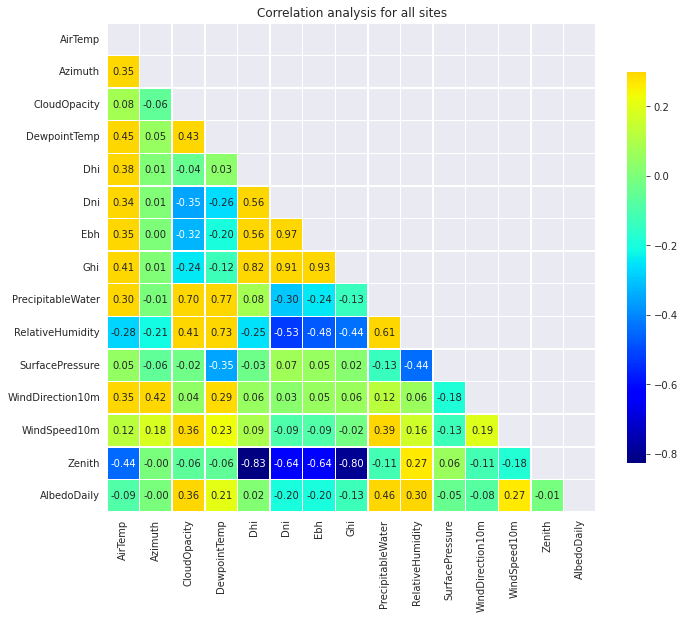

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr,mask=mask,cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

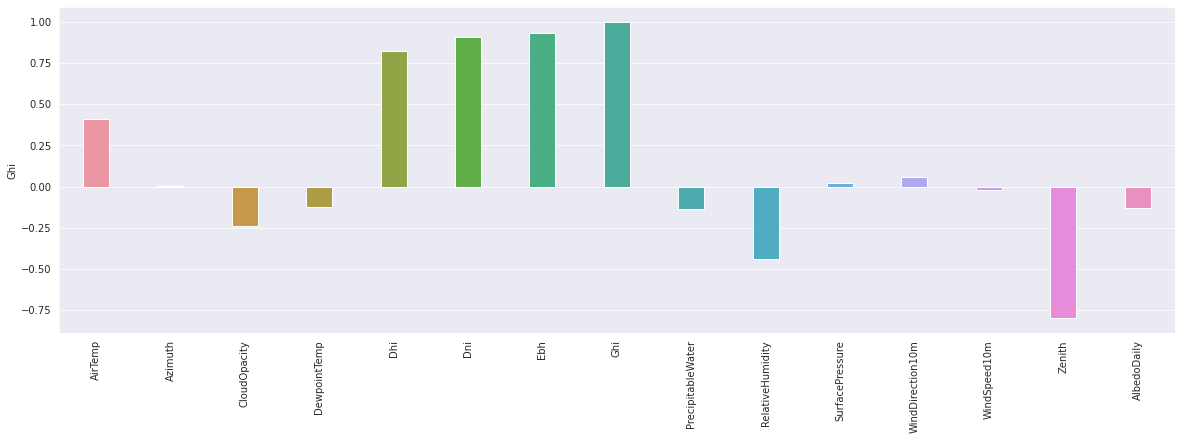

In [16]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x=data_corr['Ghi'].index,y=data_corr['Ghi'],ax=ax)
change_width(ax, .35)
plt.xticks(rotation=90)
plt.show()



In [74]:
X=data17_20.drop(["Dhi","Dni","Ebh"],axis=1)
y=data17_20['Ghi']

In [75]:
# def spliting_data(data):
#   X_train=data[(data.Date.dt.year>=2019) & (data.Date.dt.year<=2021)]
#   y_train=data[(data.Date.dt.year>=2019) & (data.Date.dt.year<=2021)]["Ghi"]
#   X_val=data[data.Date.dt.year==2022].iloc[:-108,:]
#   y_val=data[data.Date.dt.year==2022].iloc[:-108,4]
#   X_test=data[data.Date.dt.year==2022].iloc[-108:,:]
#   y_test=data[data.Date.dt.year==2022].iloc[-108:,4]
#   return (X_train,X_val,X_test,y_train,y_val,y_test)

In [76]:
# X_train,X_val,X_test,y_train,y_val,y_test=spliting_data(data)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=1/3.0,random_state=42,shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,random_state= 8,shuffle=False)

In [78]:
X_train

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70246,22.4,119,0.0,20.2,0,17.9,87.5,1026.4,5,2.1,171,0.11,2017-01-01 00:00:00+05:30
70247,22.3,135,0.0,20.2,0,18.0,87.7,1026.3,7,2.1,174,0.11,2017-01-01 00:15:00+05:30
70248,22.2,170,0.0,20.2,0,18.1,88.0,1026.2,10,2.0,176,0.11,2017-01-01 00:30:00+05:30
70249,22.1,-147,0.0,20.1,0,18.1,88.3,1026.0,13,2.0,175,0.11,2017-01-01 00:45:00+05:30
70250,22.1,-124,0.0,20.1,0,18.2,88.5,1025.9,16,1.9,173,0.11,2017-01-01 01:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116993,26.2,38,0.0,24.3,0,24.3,89.2,1022.1,274,2.3,138,0.10,2018-05-02 22:45:00+05:30
116994,26.1,34,0.0,24.3,0,24.3,89.8,1022.1,274,2.2,140,0.10,2018-05-02 23:00:00+05:30
116995,26.0,29,0.0,24.3,0,24.3,90.4,1022.2,275,2.2,141,0.10,2018-05-02 23:15:00+05:30
116996,26.0,23,0.0,24.3,0,24.4,90.8,1022.2,276,2.1,143,0.10,2018-05-02 23:30:00+05:30


In [79]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

In [80]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[3] , X_train.drop(['Date','Ghi'],axis=1),X_train.drop(['Date','Ghi'],axis=1).columns )
X_val_scale  = data_scaling( scaling_strategy [3] ,X_val.drop(['Date','Ghi'],axis=1), X_val.drop(['Date','Ghi'],axis=1).columns)
X_test_scale  = data_scaling( scaling_strategy [3] ,X_test.drop(['Date','Ghi'],axis=1), X_test.drop(['Date','Ghi'],axis=1).columns)
# X_validation_scale=data_scaling( scaling_strategy [3] ,X_validation_data.iloc[:,1:], X_validation_data.iloc[:,1:].columns)

In [81]:
X_train_scale

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
70246,0.638177,0.661111,0.0,0.737226,0.218027,0.884732,0.994381,0.013889,0.214286,0.955307,0.916667
70247,0.635328,0.750000,0.0,0.737226,0.219245,0.886754,0.994284,0.019444,0.214286,0.972067,0.916667
70248,0.632479,0.944444,0.0,0.737226,0.220463,0.889788,0.994187,0.027778,0.204082,0.983240,0.916667
70249,0.629630,-0.816667,0.0,0.733577,0.220463,0.892821,0.993993,0.036111,0.204082,0.977654,0.916667
70250,0.629630,-0.688889,0.0,0.733577,0.221681,0.894843,0.993897,0.044444,0.193878,0.966480,0.916667
...,...,...,...,...,...,...,...,...,...,...,...
116993,0.746439,0.211111,0.0,0.886861,0.295981,0.901921,0.990215,0.761111,0.234694,0.770950,0.833333
116994,0.743590,0.188889,0.0,0.886861,0.295981,0.907988,0.990215,0.761111,0.224490,0.782123,0.833333
116995,0.740741,0.161111,0.0,0.886861,0.295981,0.914055,0.990312,0.763889,0.224490,0.787709,0.833333
116996,0.740741,0.127778,0.0,0.886861,0.297199,0.918099,0.990312,0.766667,0.214286,0.798883,0.833333


In [82]:
X_val_scale

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
116998,0.723464,0.066667,0.000000,0.893382,0.296029,0.925888,0.982974,0.780556,0.145833,0.810056,0.833333
116999,0.720670,0.027778,0.000000,0.893382,0.297232,0.927919,0.982878,0.786111,0.145833,0.815642,0.833333
117000,0.720670,-0.005556,0.000000,0.893382,0.298436,0.929949,0.982782,0.791667,0.145833,0.815642,0.833333
117001,0.717877,-0.044444,0.000000,0.893382,0.299639,0.930964,0.982589,0.797222,0.145833,0.815642,0.833333
117002,0.717877,-0.077778,0.000000,0.889706,0.302046,0.932995,0.982493,0.805556,0.145833,0.810056,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
163745,0.776536,0.250000,0.747423,0.875000,0.870036,0.802030,0.995671,0.669444,0.326389,0.793296,0.916667
163746,0.770950,0.227778,0.747423,0.875000,0.871239,0.807107,0.995768,0.663889,0.298611,0.804469,0.916667
163747,0.768156,0.200000,0.747423,0.875000,0.872443,0.812183,0.995864,0.658333,0.277778,0.821229,0.916667
163748,0.768156,0.166667,0.749485,0.875000,0.872443,0.814213,0.995864,0.652778,0.263889,0.826816,0.916667


# Random Forest

In [83]:
from sklearn.model_selection import GridSearchCV

In [251]:
estimator = RandomForestRegressor(random_state=0)
param_grid = {
 'criterion': ['mse'],
 'random_state': [0],
 'verbose': [0],
 'bootstrap': [True, False],
 'max_depth': [30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3],
 'min_samples_split': [10],
 'n_estimators': [100]}
grid = GridSearchCV(estimator, param_grid, n_jobs=4,return_train_score=True)
grid.fit(X_train_scale, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [30], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3], 'min_samples_split': [10],
                         'n_estimators': [100], 'random_state': [0],
                         'verbose': [0]},
             return_train_score=True)

In [252]:
grid.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=3,
                      min_samples_split=10, random_state=0)

In [253]:

grid.best_score_

0.9963326611345946

In [254]:
predictions = grid.predict(X_train_scale)

In [255]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [256]:
df_final_train = pd.DataFrame({'Predicted':predictions,'Actaul':y_train[predictions.shape[0]*-1:],'Date': X_train["Date"][predictions.shape[0]*-1:]})

Text(0, 0.5, 'Ghi')

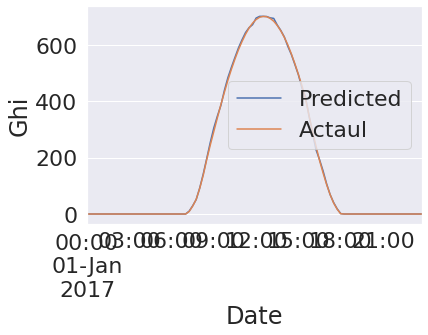

In [257]:
df_final_train.set_index('Date')[['Predicted','Actaul']].iloc[0:96,:].plot()
plt.ylabel('Ghi')

In [258]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [298]:
np.sqrt(mean_squared_error(y_train, grid.predict(X_train_scale)))

8.347200531630813

In [260]:
mean_absolute_error(y_train, grid.predict(X_train_scale))

4.095027406295741

In [261]:
grid.score(X_val_scale,y_val)

0.9950818173588344

In [262]:
mean_squared_error(y_val, grid.predict(X_val_scale))

401.97850661008937

In [263]:
mean_absolute_error(y_val, grid.predict(X_val_scale))

9.696047997659063

In [264]:
grid.score(X_test_scale,y_test)

0.9956192716360911

In [265]:
mean_squared_error(y_test, grid.predict(X_test_scale))

331.95217712883124

In [266]:
mean_absolute_error(y_test, grid.predict(X_test_scale))

8.837100961777583

In [267]:
pred_test =grid.predict(X_test_scale)
df_final_test = pd.DataFrame({'Predicted':pred_test,'Actual':y_test[pred_test.shape[0]*-1:],'Date': X_test["Date"][pred_test.shape[0]*-1:]})

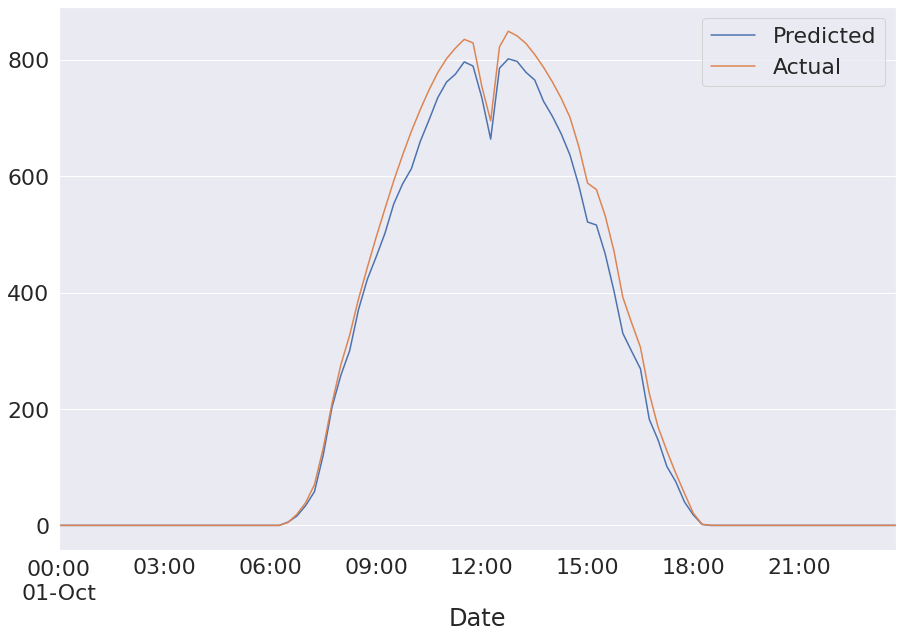

In [268]:
df_final_test.set_index('Date')[['Predicted','Actual']].iloc[96*29:96*30,:].plot(figsize=(15,10))

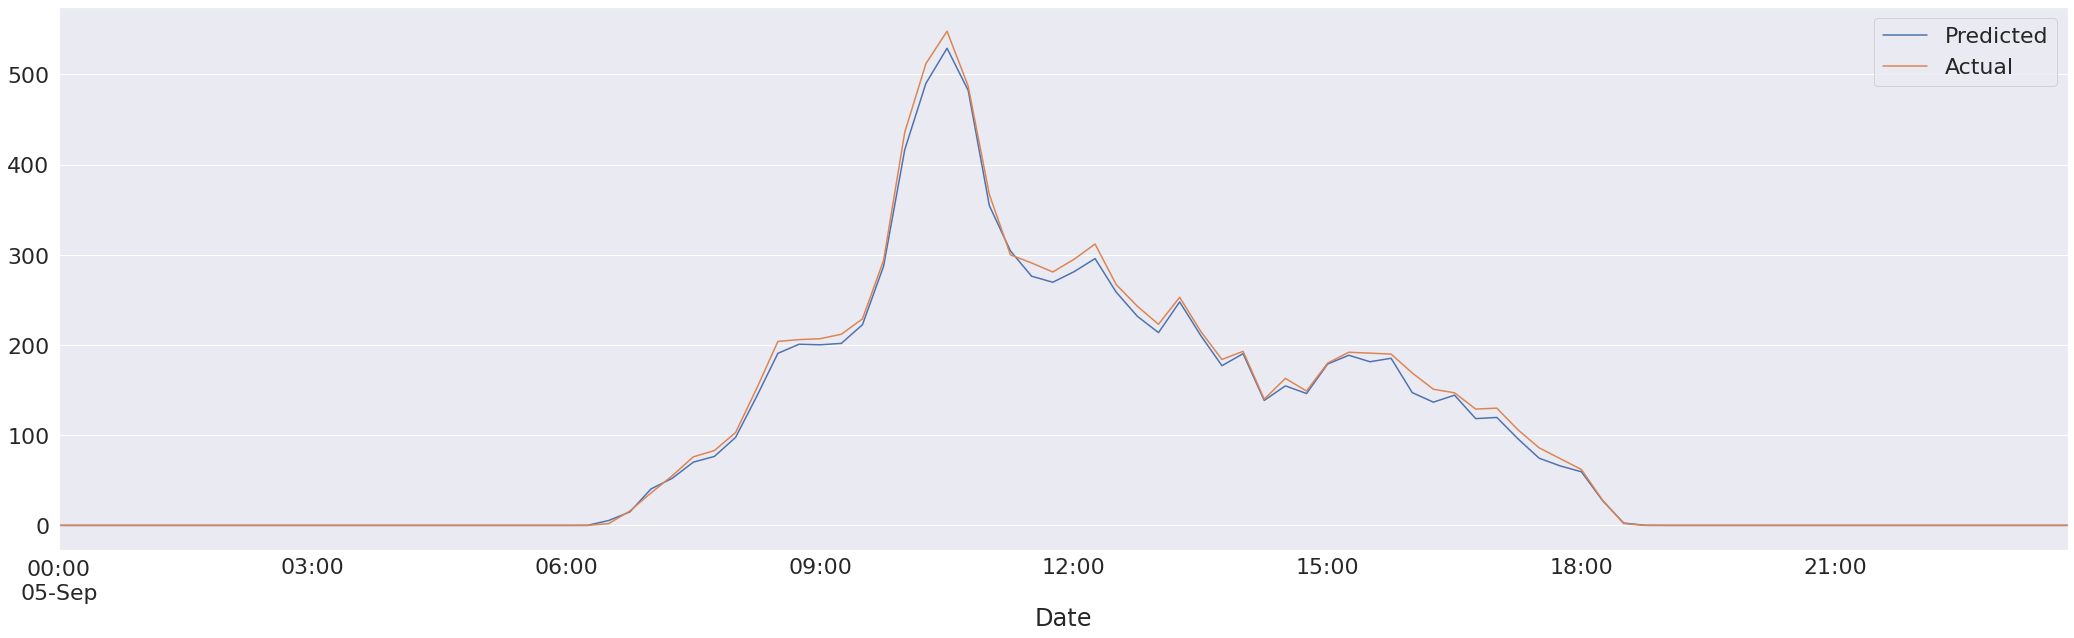

In [269]:
df_final_test.set_index('Date')[['Predicted','Actual']].iloc[96*3:96*4,:].plot(figsize=(36,10))

# Model Validation

In [283]:
validation_data=data[data.Date.dt.year==2022].drop(["Dhi","Dni","Ebh"],axis=1)

In [284]:
validation_data

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
245542,25.6,120,0.0,18.2,0,29.8,63.4,0.0,1046.3,22,3.0,171,0.11,2022-01-01 00:00:00+05:30
245543,25.6,136,0.0,18.1,0,29.8,63.1,0.0,1046.3,24,2.9,174,0.11,2022-01-01 00:15:00+05:30
245544,25.5,172,0.0,17.9,0,29.7,62.8,0.0,1046.3,27,2.8,176,0.11,2022-01-01 00:30:00+05:30
245545,25.5,-147,0.0,17.8,0,29.7,62.4,0.0,1046.3,32,2.7,175,0.11,2022-01-01 00:45:00+05:30
245546,25.5,-124,0.0,17.6,0,29.6,61.9,0.0,1046.3,37,2.7,172,0.11,2022-01-01 01:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,25.1,-105,0.1,13.7,0,21.0,49.1,0.0,1039.0,83,2.6,131,0.11,2022-12-21 04:00:00+05:30
279543,25.1,-105,0.0,13.5,0,21.0,48.6,0.0,1039.0,85,2.7,127,0.11,2022-12-21 04:15:00+05:30
279544,25.0,-106,0.0,13.3,0,21.1,48.2,0.0,1039.1,86,2.7,124,0.11,2022-12-21 04:30:00+05:30
279545,25.0,-107,0.0,13.1,0,21.1,47.7,0.0,1039.2,85,2.7,120,0.11,2022-12-21 04:45:00+05:30


In [285]:
validation_data.drop('SnowWater',axis=1,inplace=True)

In [286]:
X_validation_scale=data_scaling( scaling_strategy [3] ,validation_data.drop(['Date','Ghi'],axis=1), validation_data.drop(['Date','Ghi'],axis=1).columns)

In [287]:
X_validation_scale

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
245542,0.723164,0.666667,0.000000,0.710937,0.360339,0.668776,0.998473,0.061111,0.241935,0.955307,0.916667
245543,0.723164,0.755556,0.000000,0.707031,0.360339,0.665612,0.998473,0.066667,0.233871,0.972067,0.916667
245544,0.720339,0.955556,0.000000,0.699219,0.359129,0.662447,0.998473,0.075000,0.225806,0.983240,0.916667
245545,0.720339,-0.816667,0.000000,0.695312,0.359129,0.658228,0.998473,0.088889,0.217742,0.977654,0.916667
245546,0.720339,-0.688889,0.000000,0.687500,0.357920,0.652954,0.998473,0.102778,0.217742,0.960894,0.916667
...,...,...,...,...,...,...,...,...,...,...,...
279542,0.709040,-0.583333,0.001031,0.535156,0.253930,0.517932,0.991507,0.230556,0.209677,0.731844,0.916667
279543,0.709040,-0.583333,0.000000,0.527344,0.253930,0.512658,0.991507,0.236111,0.217742,0.709497,0.916667
279544,0.706215,-0.588889,0.000000,0.519531,0.255139,0.508439,0.991602,0.238889,0.217742,0.692737,0.916667
279545,0.706215,-0.594444,0.000000,0.511719,0.255139,0.503165,0.991698,0.236111,0.217742,0.670391,0.916667


In [288]:
y_validation=validation_data['Ghi']

In [289]:
predictions_validation = grid.predict(X_validation_scale)

# Metrics

In [290]:
grid.score(X_validation_scale,y_validation)

0.9945268534144482

In [291]:
np.sqrt(mean_squared_error(y_validation, grid.predict(X_validation_scale)))

20.699438079640124

In [292]:
mean_absolute_error(y_validation, grid.predict(X_validation_scale))

10.123845708316738

In [293]:
df_final_validation = pd.DataFrame({'Predicted':predictions_validation ,'Actual':y_validation[predictions_validation .shape[0]*-1:],'Date': validation_data["Date"][predictions_validation .shape[0]*-1:]})

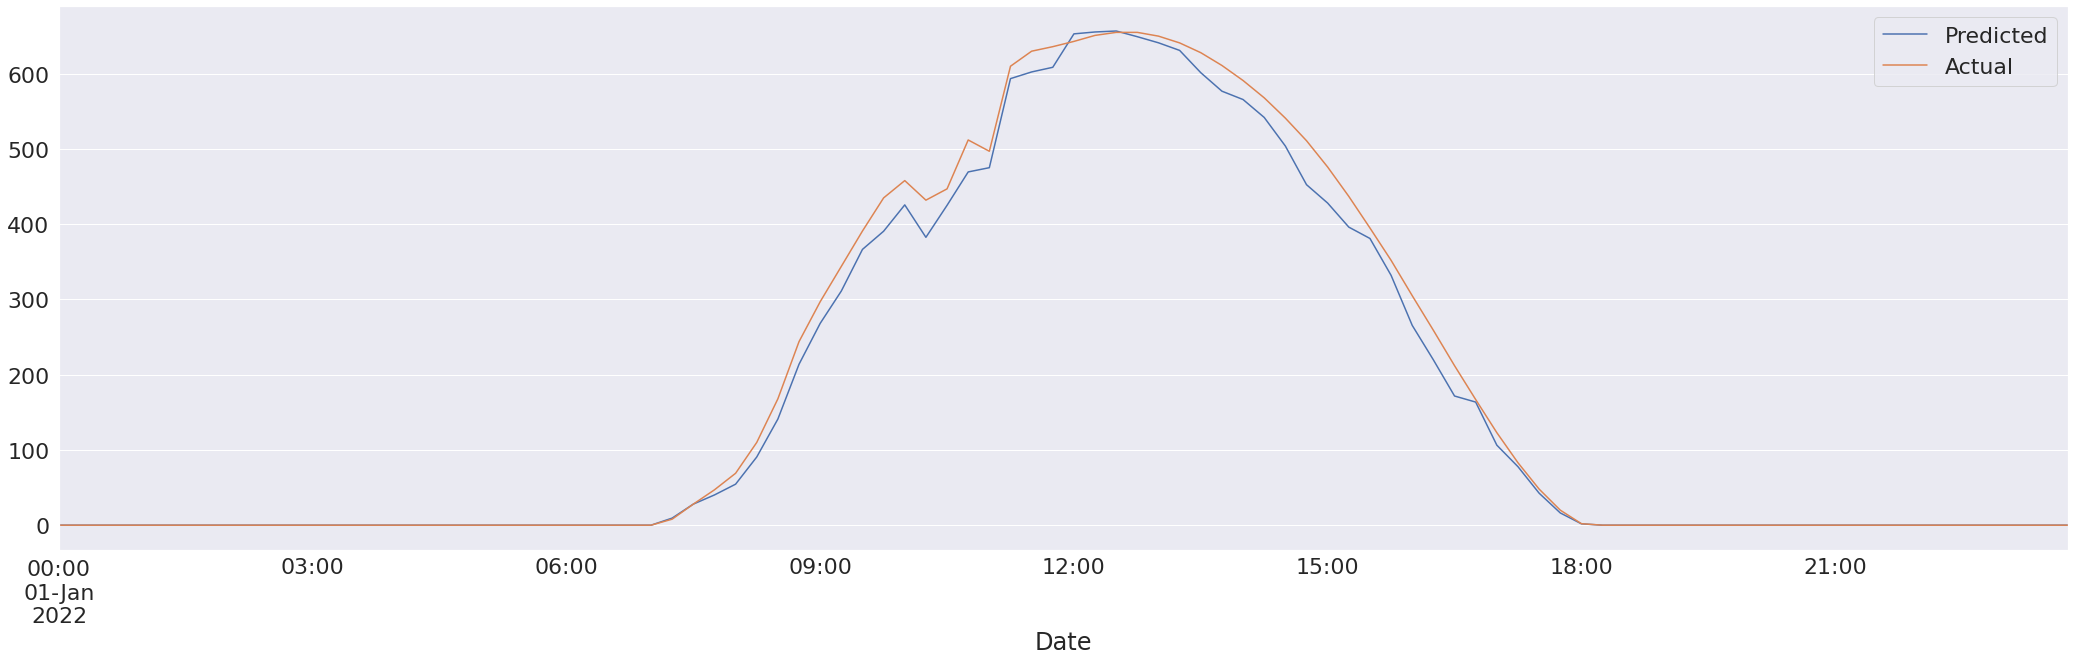

In [300]:
df_final_validation .set_index('Date')[['Predicted','Actual']].iloc[0:96*1,:].plot(figsize=(36,10))

Text(0.5, 0, 'Actual')

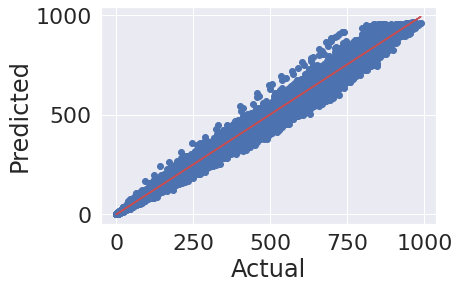

In [295]:
plt.scatter(df_final_validation['Actual'],df_final_validation['Predicted'])
z = np.polyfit(df_final_validation['Actual'], df_final_validation['Predicted'], 1)
p = np.poly1d(z)

# Display the Trendline
plt.plot(df_final_validation['Actual'], p(df_final_validation['Actual']),color='r')
plt.ylabel('Predicted')
plt.xlabel('Actual')